In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from k_means import kMeans
from k_centers import kCenters
from single_swap import singleSwap
from spectral_clustering import spectralClustering
from EM import EM

%matplotlib inline

In [2]:
# read the data
clustering = pd.read_csv('./data/clustering.csv', header=None).values
bigClustering = pd.read_csv('./data/bigClusteringData.csv', header=None).values

# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

# 0. Plot the original distribution

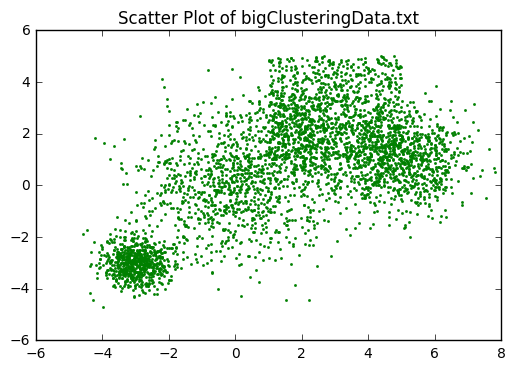

In [3]:
# plot the clustered data
fig, ax = plt.subplots()
ax.plot(clustering[:, 0], clustering[:, 1], 'g.', markersize=4)
ax.set_title('Scatter Plot of clustering.txt')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/pdf/clustering_scatter.pdf')
fig.savefig('./result/clustering_scatter.png', dpi=300)
plt.show()

# plot the clustered data
fig, ax = plt.subplots()
ax.plot(bigClustering[:, 0], bigClustering[:, 1], 'g.', markersize=3)
ax.set_title('Scatter Plot of bigClusteringData.txt')
ax.legend(fontsize=8, loc='best')
fig.savefig('./result/pdf/bigClustering_scatter.pdf')
fig.savefig('./result/bigClustering_scatter.png', dpi=300)
plt.show()

# I. K-Means Algorithm

In [4]:
# Test of convergence with different tols
print('clustering.txt')
X = clustering
K = 3

for tol in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
    print('tol is', tol, '\t', 'D is', D)
    
print('\n')
print('bigClusteringData.txt')
X = bigClustering
K = 3

for tol in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]:
    Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
    print('tol is', tol, '\t', 'D is', D)

clustering.txt
tol is 1e-07 	 D is 4.54339102628
tol is 1e-06 	 D is 4.54339102628
tol is 1e-05 	 D is 4.54339102628
tol is 0.0001 	 D is 4.58667999013
tol is 0.001 	 D is 4.71114225534
tol is 0.01 	 D is 5.10094342337
tol is 0.1 	 D is 4.55194633768
tol is 1 	 D is 5.07892675786
tol is 10 	 D is 4.8486236535


bigClusteringData.txt
tol is 1e-07 	 D is 5.06651422081
tol is 1e-06 	 D is 5.12566157282
tol is 1e-05 	 D is 5.06651422081
tol is 0.0001 	 D is 5.06651422081
tol is 0.001 	 D is 5.06651422081
tol is 0.01 	 D is 5.17180870059
tol is 0.1 	 D is 4.87822146202
tol is 1 	 D is 4.96235770125
tol is 10 	 D is 4.96091478328


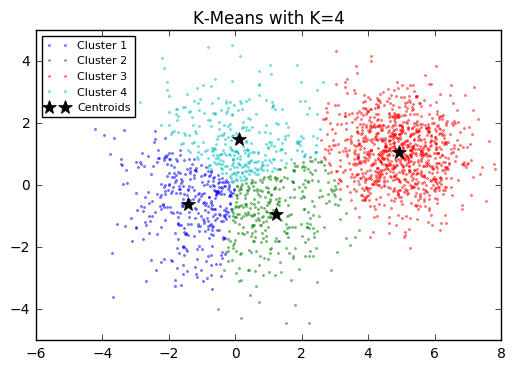

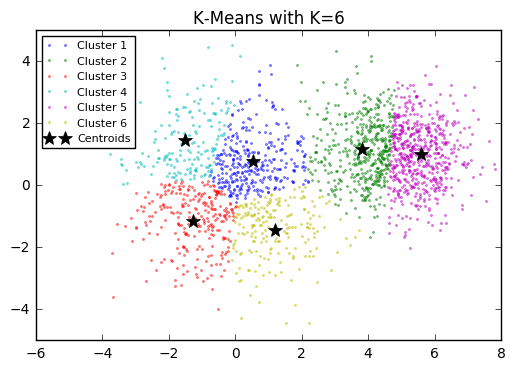

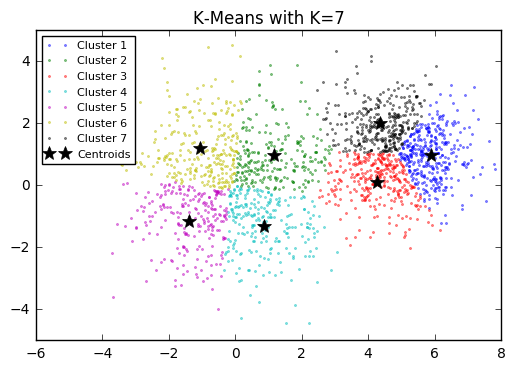

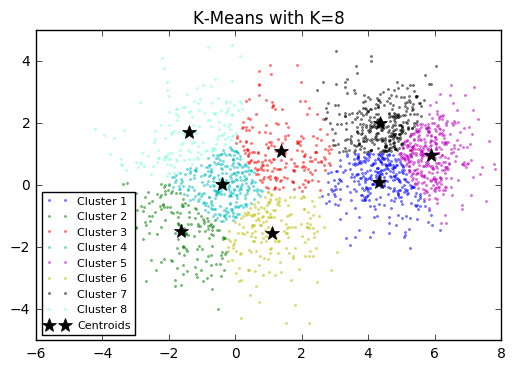

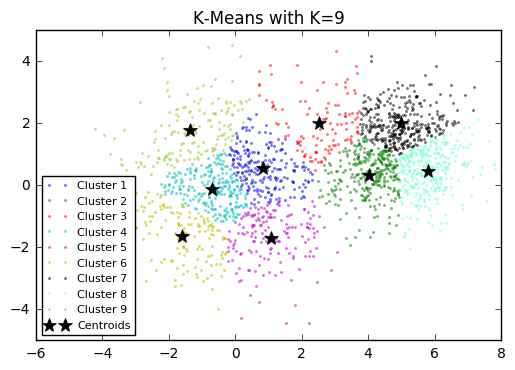

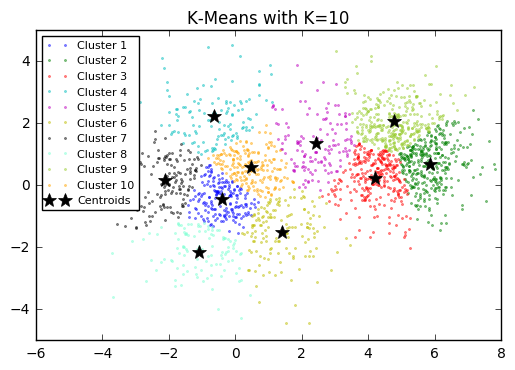

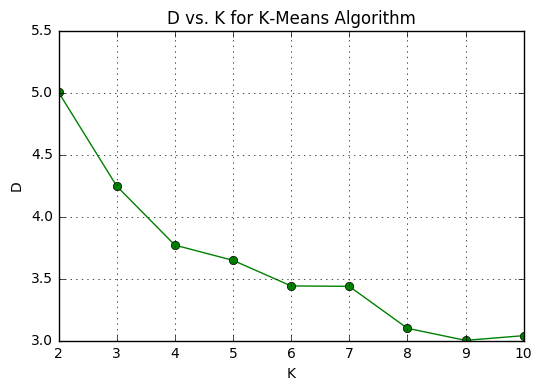

D	 [5.0007985783083502, 4.2446660070158311, 3.769315274693859, 3.6464008915693169, 3.4401048996234755, 3.4367400954057388, 3.0985951014174877, 3.0009571101338306, 3.0390795824112593]
Index
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 1.  1.  2.  1.  2.  2.  2.  1.  2.  1.  2.  1.  2.  2.  1.  2.  2.  1.
  1.  2.]
[ 1.  0.  0.  0.  3.  3.  3.  1.  3.  1.  3.  1.  3.  3.  0.  3.  3.  1.
  0.  1.]
[ 4.  0.  0.  0.  3.  3.  3.  4.  3.  4.  3.  4.  3.  1.  4.  3.  3.  4.
  0.  4.]
[ 5.  2.  2.  2.  3.  0.  0.  5.  0.  0.  0.  5.  0.  0.  2.  0.  0.  5.
  2.  0.]
[ 3.  4.  4.  4.  5.  5.  1.  3.  1.  3.  1.  3.  1.  1.  4.  1.  5.  3.
  4.  1.]
[ 5.  3.  3.  3.  7.  3.  3.  5.  2.  3.  2.  5.  2.  2.  1.  2.  3.  5.
  3.  2.]
[ 4.  3.  3.  3.  8.  0.  3.  4.  0.  0.  0.  4.  2.  2.  5.  0.  8.  4.
  3.  0.]
[ 0.  0.  6.  0.  3.  9.  9.  7.  4.  0.  9.  5.  4.  4.  7.  9.  9.  5.
  0.  9.]


In [5]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tol = 1e-5
X = clustering

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(2, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kMeans.pdf')
fig.savefig('./result/loss_clustering_kMeans.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

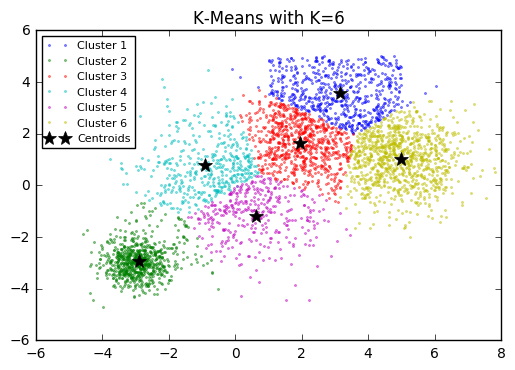

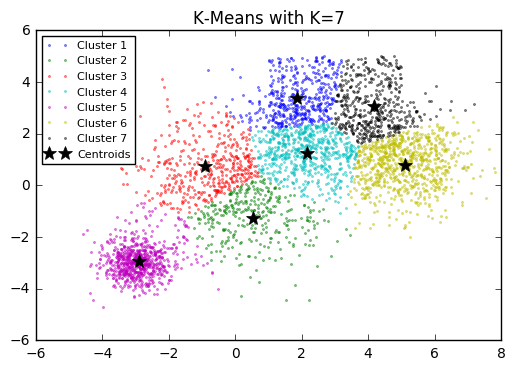

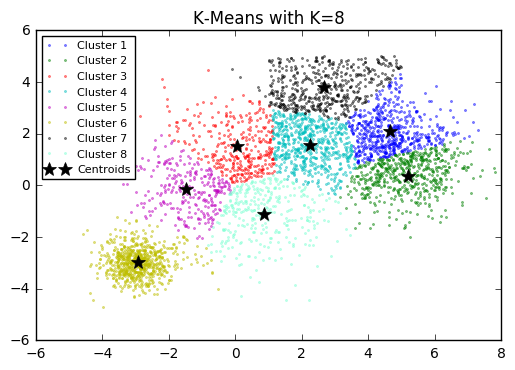

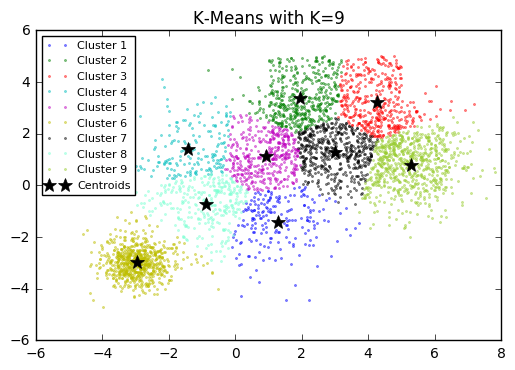

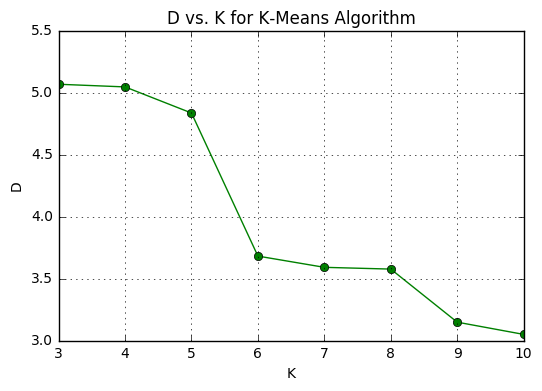

D	 [5.0665142208144074, 5.0450674354935439, 4.8345302117199456, 3.6807098140033774, 3.5900899831977178, 3.5758986709879443, 3.1479516644127434, 3.0492245938741922]
Index
[ 1.  2.  0.  2.  2.  0.  2.  0.  2.  0.  2.  0.  1.  1.  2.  2.  1.  2.
  2.  2.]
[ 3.  0.  2.  1.  1.  2.  1.  2.  1.  2.  0.  1.  3.  3.  1.  1.  0.  0.
  0.  1.]
[ 3.  2.  0.  2.  2.  0.  2.  0.  2.  0.  2.  4.  3.  3.  2.  4.  1.  2.
  2.  4.]
[ 5.  2.  1.  2.  3.  1.  4.  1.  2.  1.  2.  3.  5.  5.  2.  4.  0.  2.
  0.  4.]
[ 5.  3.  4.  3.  2.  4.  3.  4.  3.  4.  3.  2.  6.  5.  3.  1.  6.  3.
  0.  2.]
[ 1.  3.  5.  2.  2.  5.  7.  5.  3.  5.  3.  4.  0.  1.  3.  7.  6.  3.
  6.  7.]
[ 8.  6.  5.  4.  4.  5.  0.  5.  4.  5.  4.  3.  2.  8.  4.  0.  2.  4.
  1.  4.]
[ 4.  2.  5.  8.  8.  5.  8.  5.  2.  5.  2.  3.  7.  6.  2.  0.  7.  2.
  9.  8.]


In [6]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kMeans.pdf')
fig.savefig('./result/loss_bigClustering_kMeans.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

# II. Greedy K-Centers Algorithm

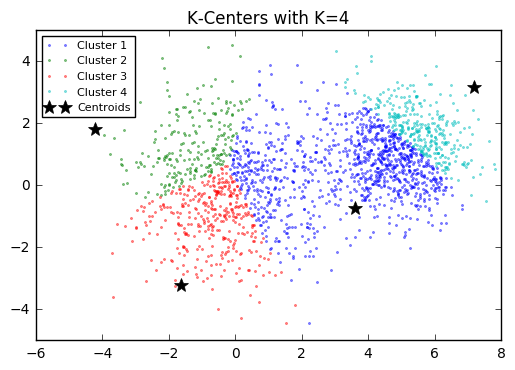

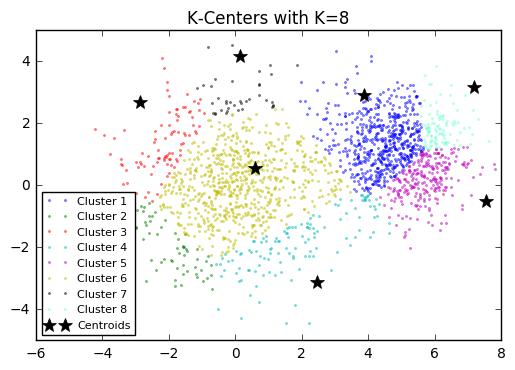

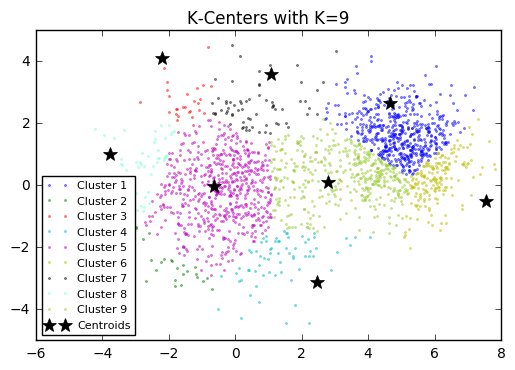

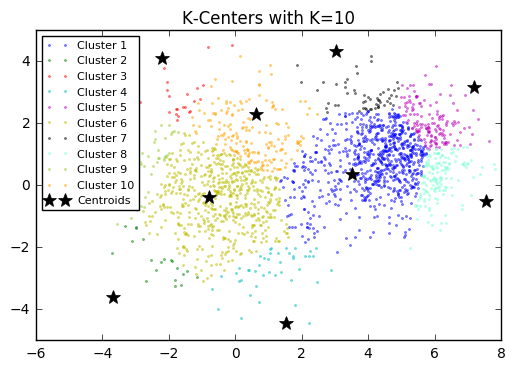

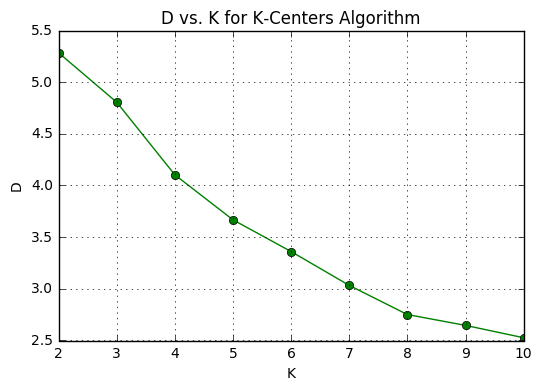

D	 [5.2838110819085875, 4.8054707641291499, 4.1030381697469016, 3.6677665601834586, 3.3607989586406388, 3.0333097649267544, 2.7510803358135512, 2.646296005381862, 2.5266876221646393]
Index
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
[2 2 1 2 1 3 3 2 3 2 3 2 3 3 2 3 3 2 2 3]
[2 2 2 2 1 3 2 2 3 2 3 2 3 3 2 3 3 2 2 0]
[5 5 5 5 2 5 5 5 5 5 5 5 5 5 1 5 5 3 5 5]
[6 6 0 6 0 0 0 6 5 6 0 6 0 5 6 0 0 6 0 5]
[6 6 6 6 0 0 0 6 0 6 0 6 0 5 6 0 0 2 6 0]
[8 8 8 8 8 8 8 5 8 8 8 8 8 4 5 8 8 5 8 8]
[7 7 0 7 8 7 7 7 7 7 7 7 3 7 4 7 7 4 7 7]


In [7]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
X = clustering

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(2, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kCenter.pdf')
fig.savefig('./result/loss_clustering_kCenter.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

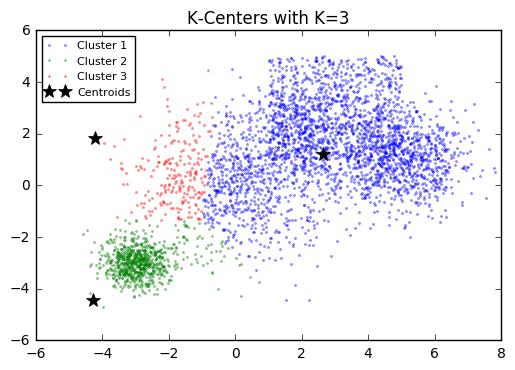

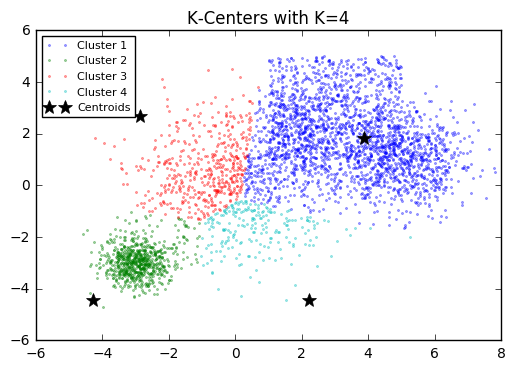

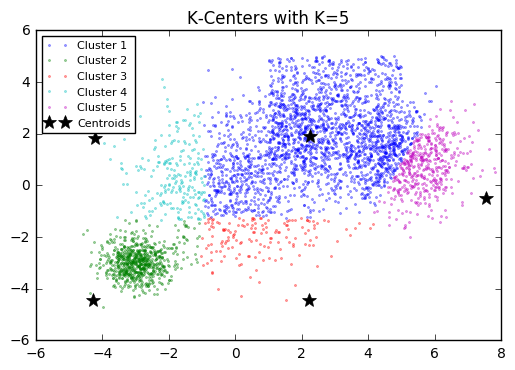

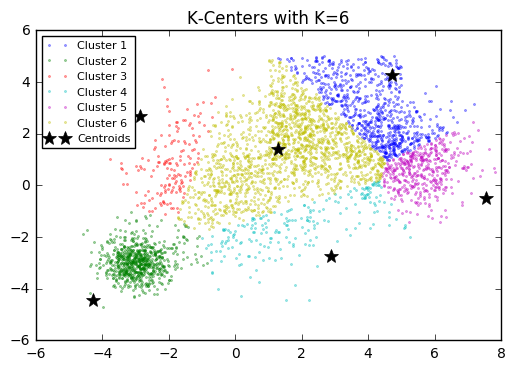

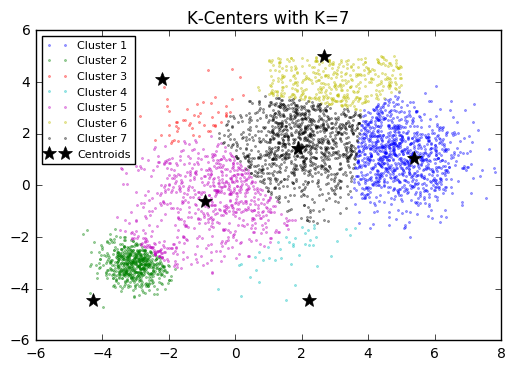

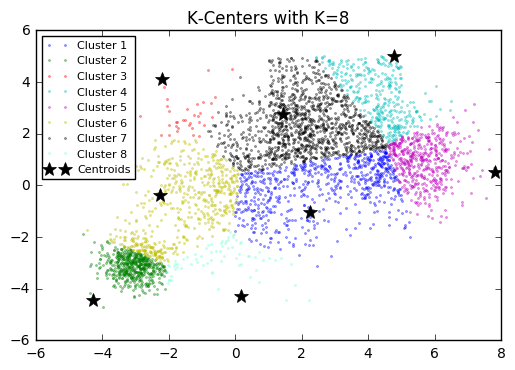

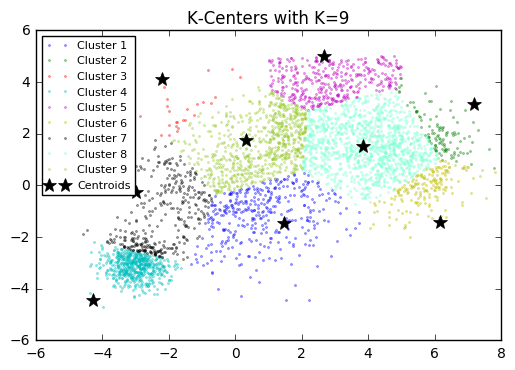

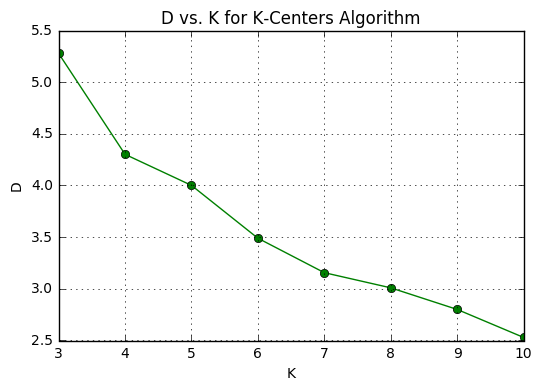

D	 [5.2783634166377746, 4.3015590343967158, 4.0011732516975567, 3.4896502651268655, 3.1563080663965613, 3.0096691994303959, 2.800508989451739, 2.5295724955019576]
Index
[0 0 1 0 0 1 0 1 0 1 0 2 0 0 0 0 0 0 2 0]
[3 3 0 3 2 0 3 0 3 0 3 0 1 1 3 3 1 3 2 3]
[3 3 0 2 2 0 3 0 3 0 2 0 1 3 3 0 1 2 2 0]
[0 0 1 5 5 1 5 1 5 1 5 5 0 0 5 5 4 5 4 5]
[4 5 3 6 6 0 5 3 5 3 5 6 5 4 5 0 5 5 5 6]
[5 5 2 0 0 6 5 2 5 2 5 6 4 1 5 6 4 5 0 6]
[7 4 8 4 4 8 4 1 4 1 4 6 0 0 4 4 5 4 5 4]
[5 5 0 6 6 0 3 0 5 0 5 6 5 7 5 6 5 5 2 6]


In [8]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kCenter.pdf')
fig.savefig('./result/loss_bigClustering_kCenter.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

# III. Single-Swap Algorithm

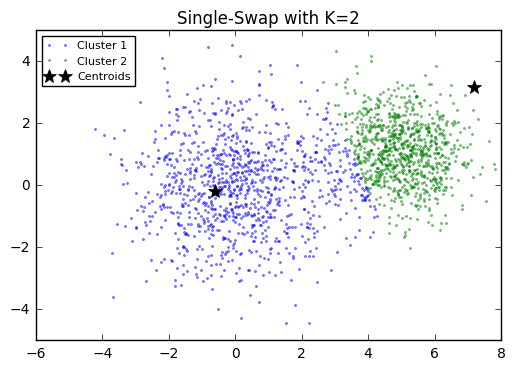

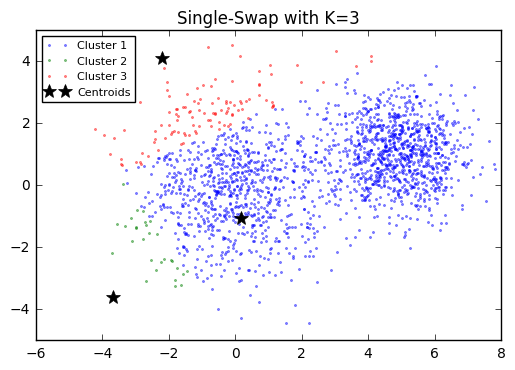

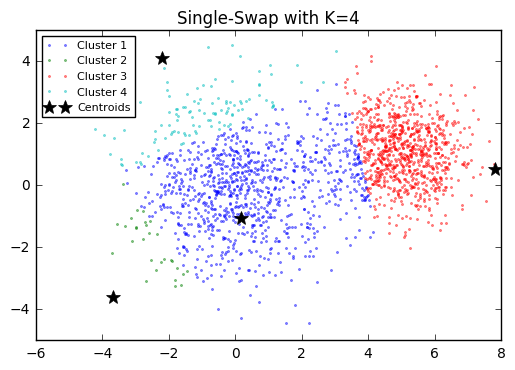

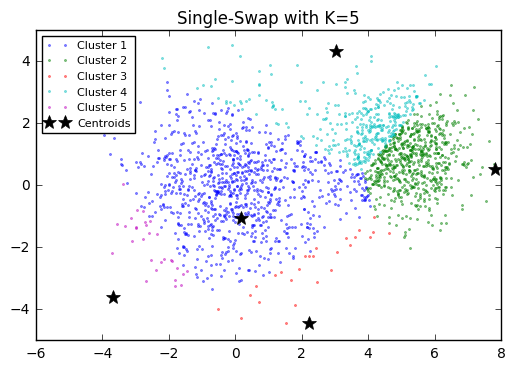

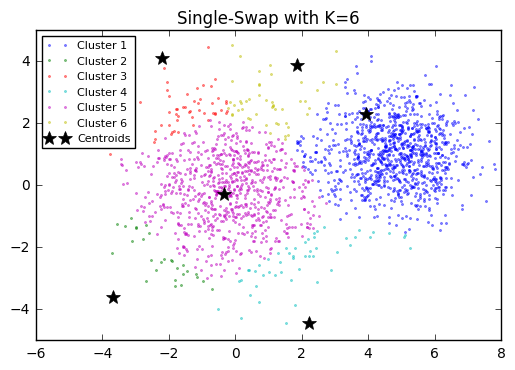

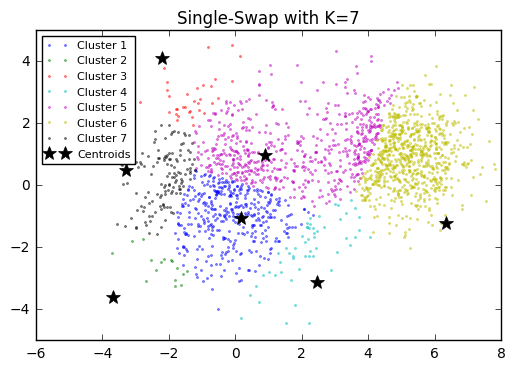

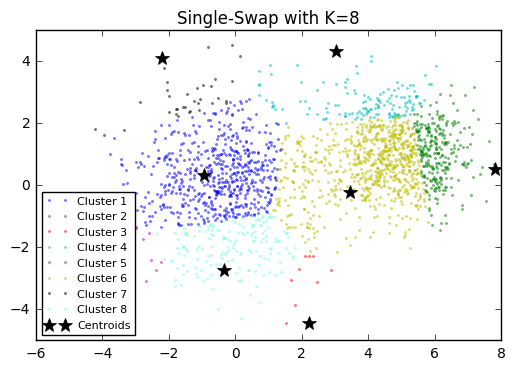

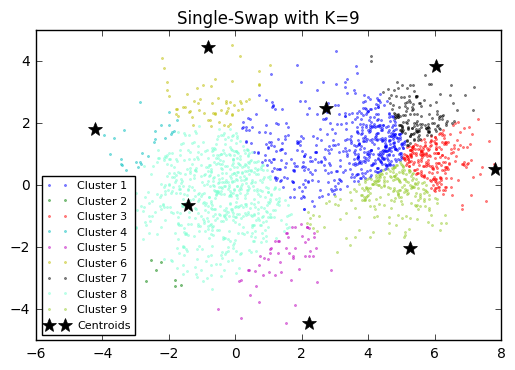

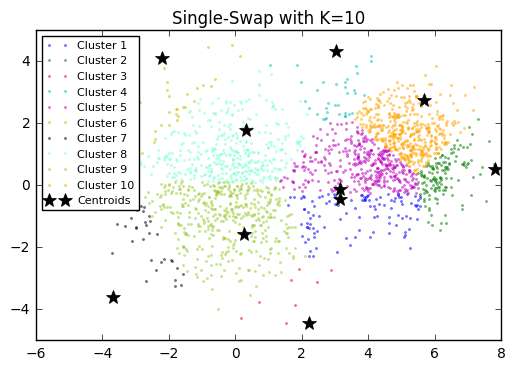

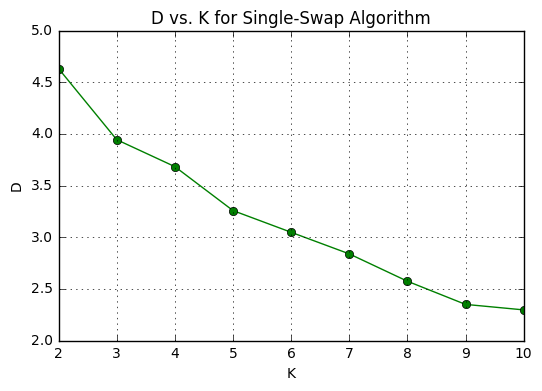

D	 [4.6305437009491657, 3.9432653536504487, 3.6826351570580544, 3.2573209519634383, 3.0473498683282165, 2.8383331481698906, 2.5737009324317386, 2.3493898149306767, 2.2962471992579547]
Index
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0]
[0 0 0 0 1 3 0 0 3 0 3 0 3 3 0 3 3 0 0 3]
[0 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 3 0 0]
[0 0 0 0 0 0 0 0 4 0 0 0 4 4 0 0 0 0 0 0]
[6 6 6 6 6 6 6 6 0 6 0 6 4 0 3 6 6 6 6 0]
[6 6 6 6 6 6 6 0 6 6 6 6 5 5 0 6 6 0 6 6]
[4 4 4 4 0 4 4 4 4 4 4 4 3 8 2 4 4 2 4 4]
[0 0 0 0 6 8 8 0 8 0 8 0 3 8 4 8 8 4 0 8]


In [9]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tau = 0.05
X = clustering

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(2, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_singleSwap.pdf')
fig.savefig('./result/loss_clustering_singleSwap.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

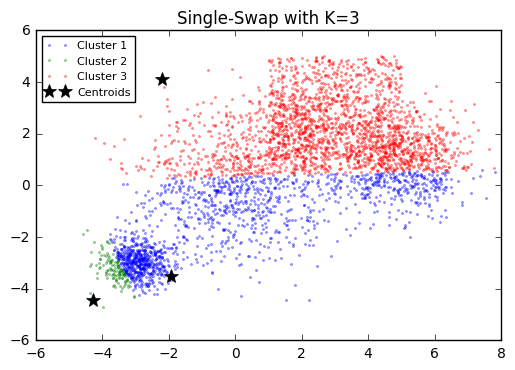

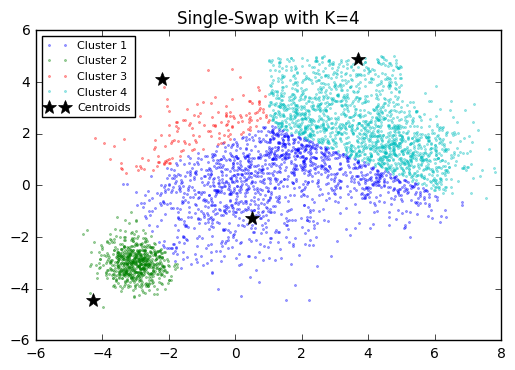

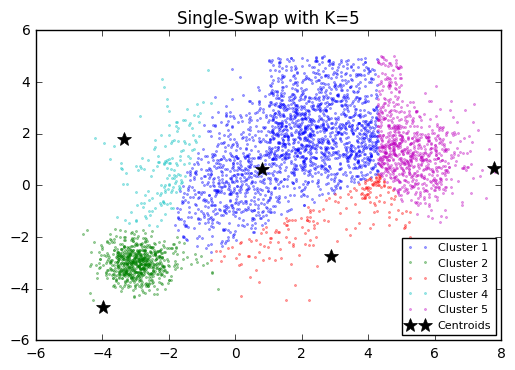

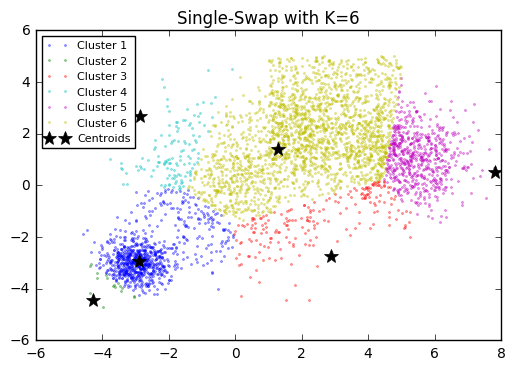

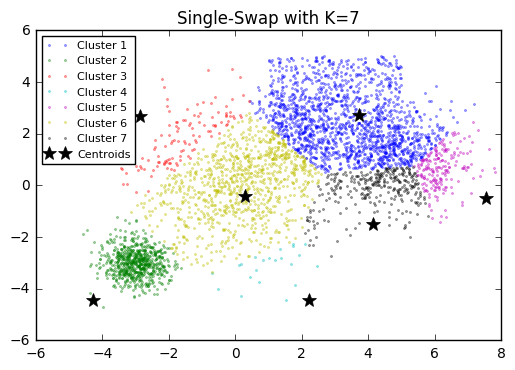

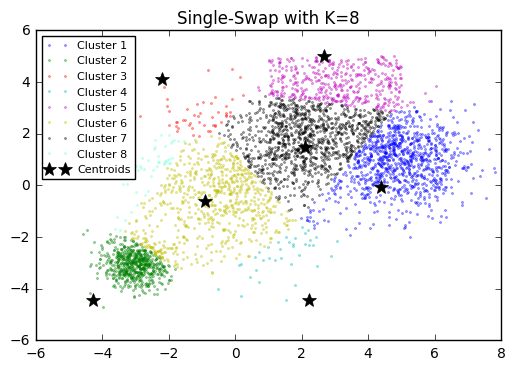

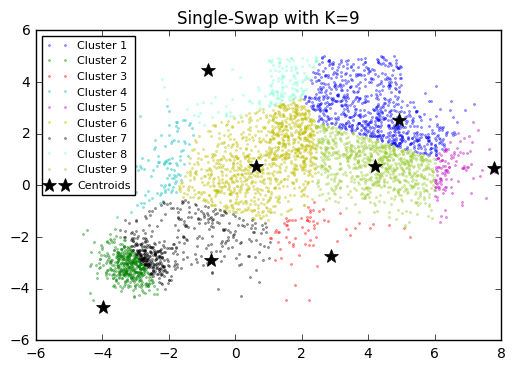

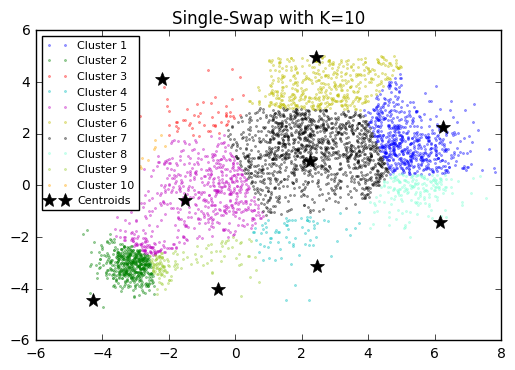

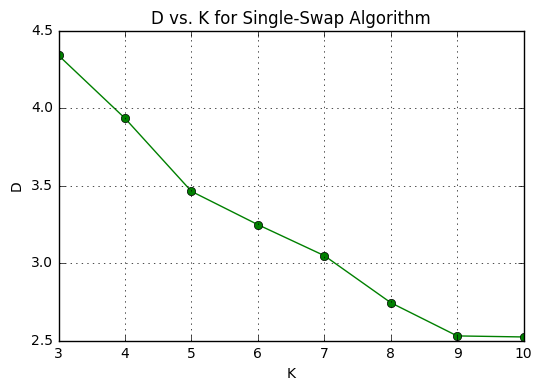

D	 [4.3387592927010834, 3.9330707405283216, 3.4619950852073718, 3.2472991977949919, 3.0473498683282165, 2.743859879804361, 2.5295724955019576, 2.5228969273634623]
Index
[1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1]
[0 0 1 0 0 1 0 1 0 1 0 2 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 1 0 1 0 0 4 4 0 0 4 0 4 0]
[3 0 1 0 0 1 4 1 0 1 0 4 5 3 0 4 5 0 5 4]
[0 0 1 6 6 1 0 1 0 1 0 6 5 2 0 6 5 0 5 6]
[7 7 0 5 5 0 7 0 5 0 5 5 1 4 5 5 1 5 6 5]
[5 5 8 6 6 8 3 8 5 8 5 6 0 7 5 6 0 5 2 6]
[6 6 0 5 5 9 6 0 5 0 5 5 8 4 5 5 8 5 7 5]


In [10]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tau = 0.05
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_singleSwap.pdf')
fig.savefig('./result/loss_bigClustering_singleSwap.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

# IV. Spectral Clustering Algorithm

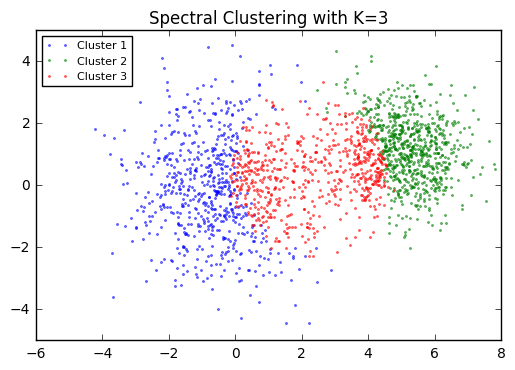

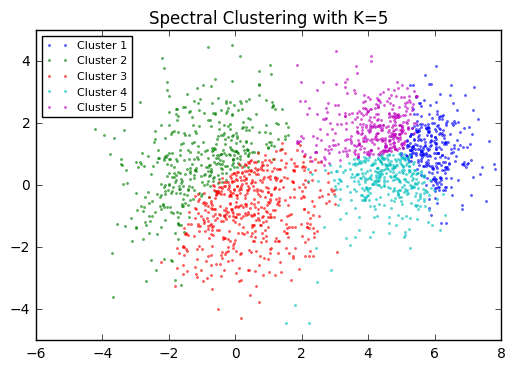

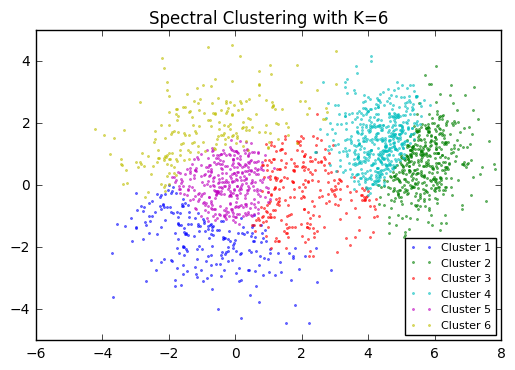

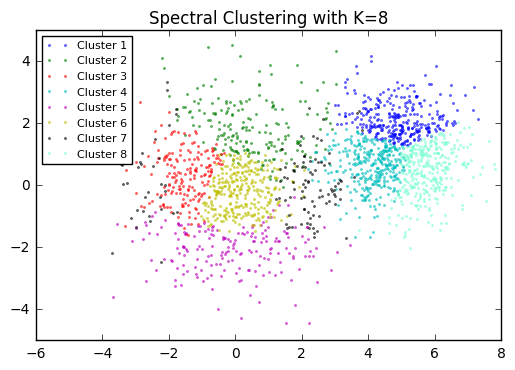

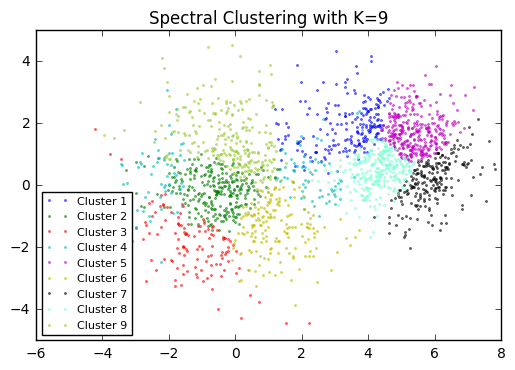

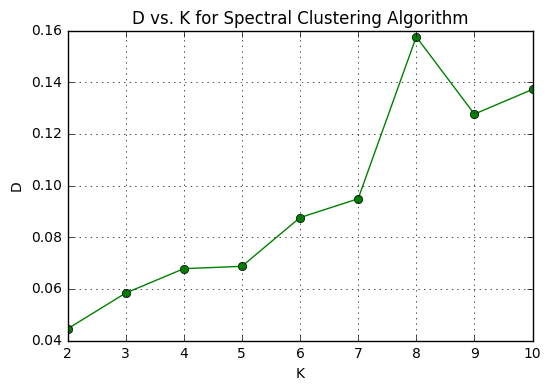

D	 [0.044498415007115481, 0.05835064932207204, 0.067807979601122906, 0.068708409257680736, 0.087584541778389452, 0.09485233402188073, 0.1575709433689497, 0.12764190735907691, 0.13718893197429255]
Index
[ 1.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.
  1.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.
  1.  0.]
[ 3.  3.  3.  3.  3.  2.  2.  3.  2.  2.  2.  2.  0.  0.  3.  2.  2.  3.
  2.  2.]
[ 0.  2.  2.  0.  1.  1.  1.  0.  1.  0.  1.  0.  1.  1.  2.  1.  1.  2.
  1.  1.]
[ 0.  0.  0.  0.  4.  0.  0.  2.  4.  0.  4.  1.  4.  4.  2.  4.  4.  2.
  0.  1.]
[ 1.  6.  6.  6.  4.  6.  6.  1.  4.  6.  4.  1.  4.  4.  1.  4.  4.  1.
  6.  6.]
[ 5.  2.  2.  5.  2.  5.  5.  4.  1.  5.  1.  5.  1.  1.  4.  1.  1.  4.
  5.  1.]
[ 4.  5.  5.  5.  2.  2.  2.  4.  3.  4.  2.  4.  0.  3.  4.  2.  2.  4.
  5.  2.]
[ 3.  5.  5.  5.  4.  5.  5.  0.  4.  5.  4.  3.  4.  4.  0.  4.  4.  3.
  5.  4.]


In [3]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 20
X = clustering

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.6, markersize=3, label='Cluster ' + str(i+1))
#     ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(2, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_spectral.pdf')
fig.savefig('./result/loss_clustering_spectral.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

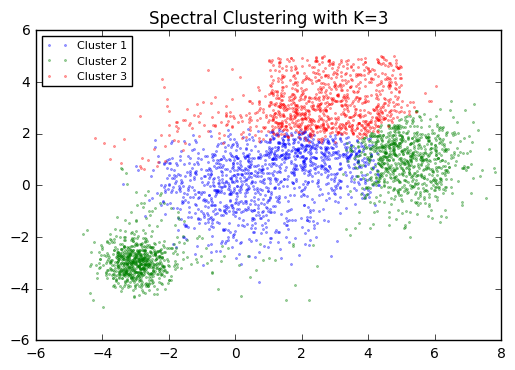

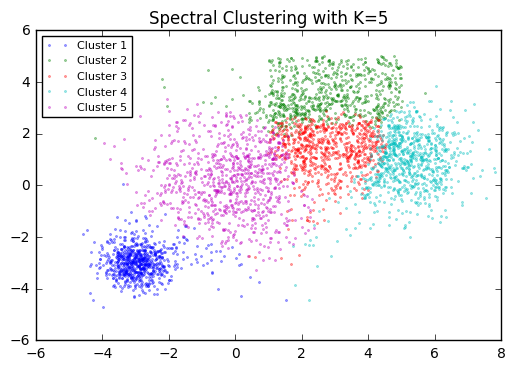

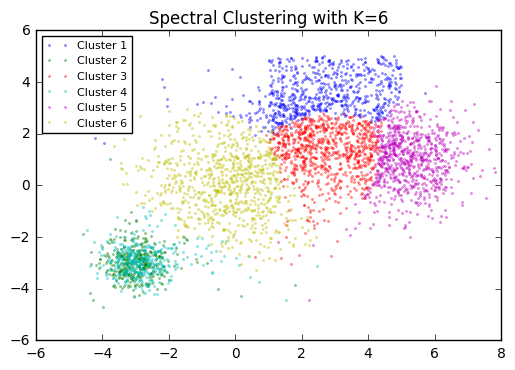

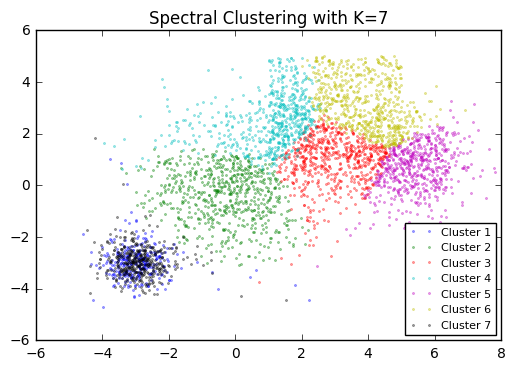

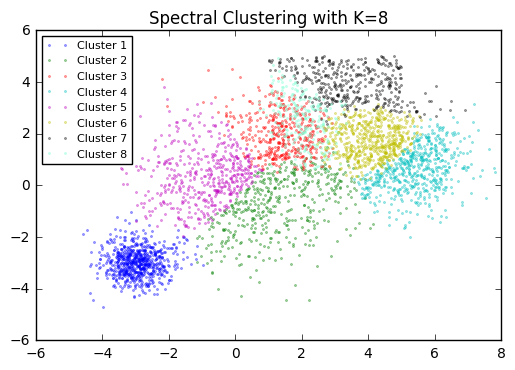

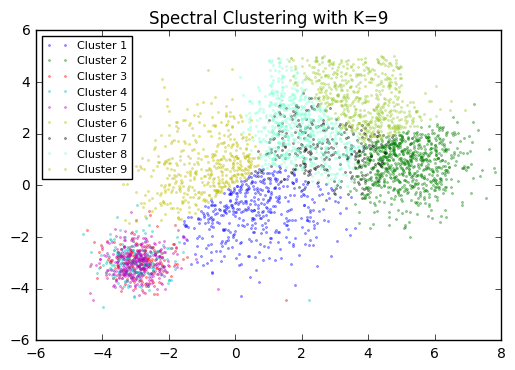

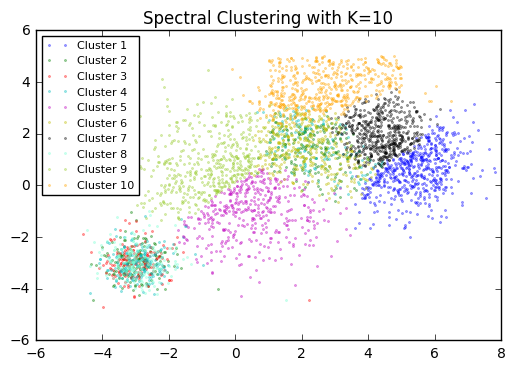

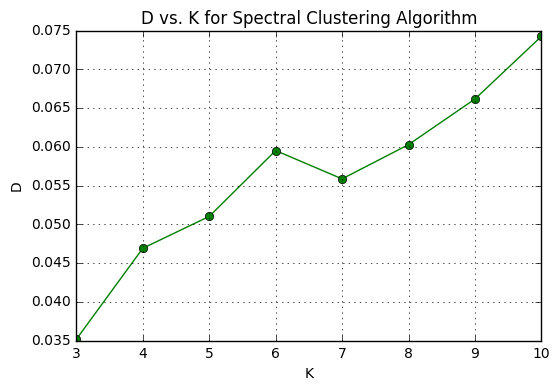

D	 [0.035163398939983659, 0.046902168278176989, 0.05101363444678382, 0.059509792212299815, 0.055854356219526072, 0.060273508680050603, 0.066159148941772467, 0.074234506539629805]
Index
[ 0.  2.  0.  2.  2.  0.  2.  0.  2.  0.  2.  2.  0.  0.  2.  2.  1.  2.
  1.  2.]
[ 3.  1.  2.  1.  1.  2.  1.  2.  1.  2.  1.  2.  3.  3.  1.  1.  2.  1.
  2.  1.]
[ 0.  1.  3.  4.  4.  3.  4.  3.  4.  3.  1.  4.  0.  0.  4.  4.  1.  1.
  1.  4.]
[ 4.  4.  1.  5.  5.  1.  4.  1.  4.  1.  4.  5.  2.  5.  4.  5.  2.  4.
  2.  5.]
[ 3.  1.  5.  4.  4.  5.  1.  5.  1.  5.  1.  4.  3.  3.  1.  4.  2.  1.
  2.  4.]
[ 2.  4.  7.  4.  4.  7.  1.  7.  4.  7.  4.  0.  5.  2.  4.  1.  5.  4.
  4.  1.]
[ 5.  4.  1.  4.  8.  1.  0.  1.  4.  1.  4.  8.  3.  5.  4.  0.  1.  4.
  1.  0.]
[ 2.  1.  4.  1.  3.  4.  7.  4.  1.  4.  1.  3.  6.  2.  1.  7.  6.  1.
  8.  7.]


In [4]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 20
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
#     ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_spectral.pdf')
fig.savefig('./result/loss_bigClustering_spectral.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

# V. EM Algorithm

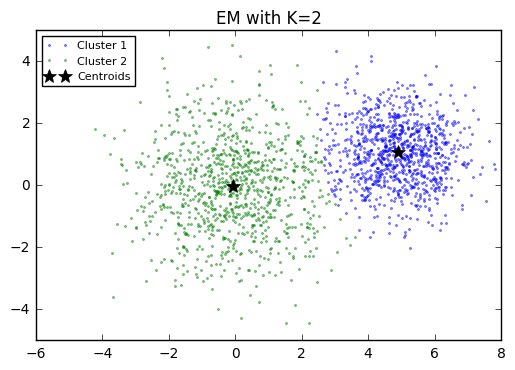

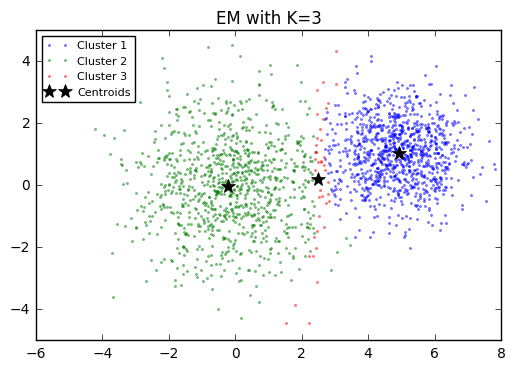

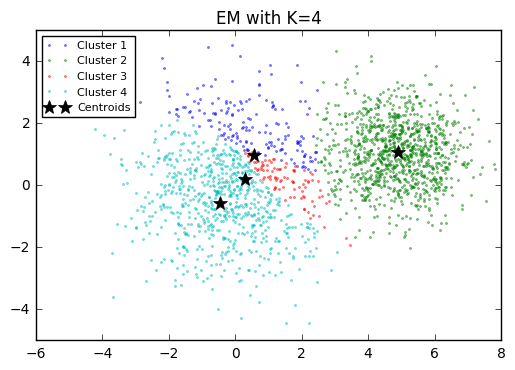

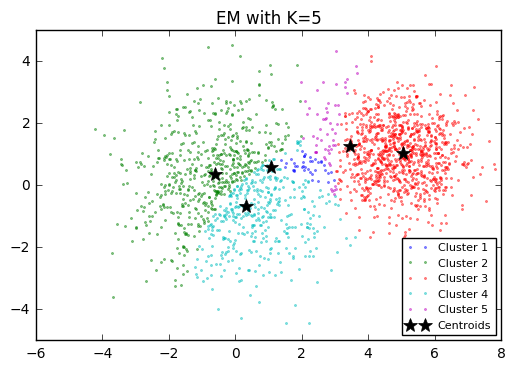

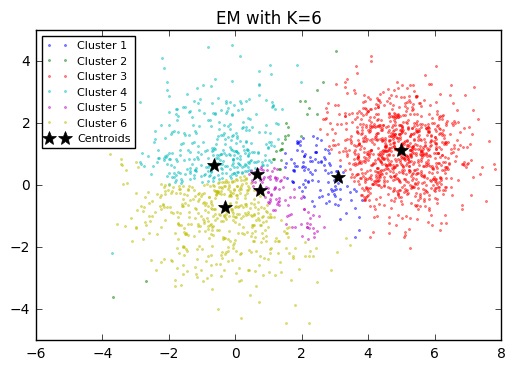

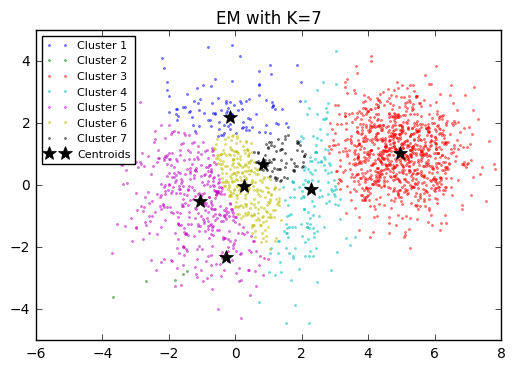

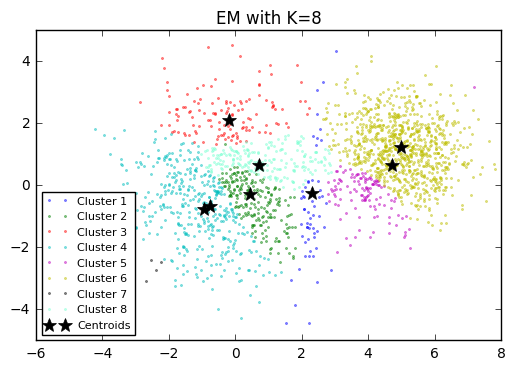

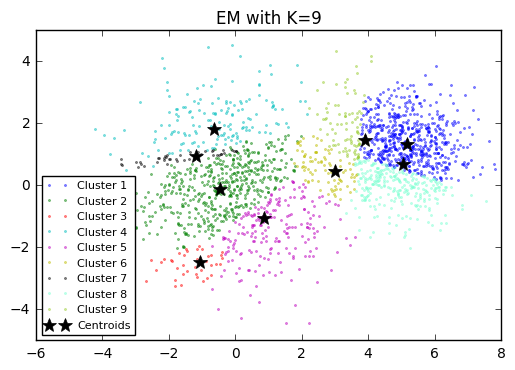

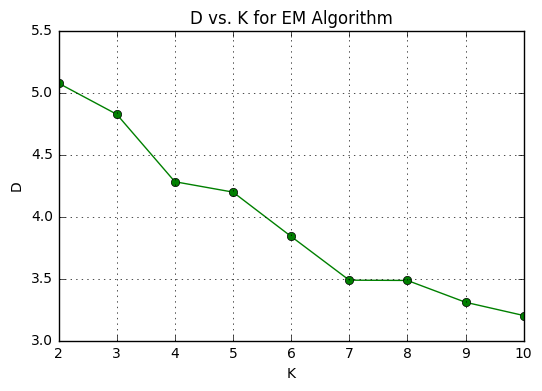

D	 [5.0744672991463435, 4.8242115122953857, 4.2804221847585007, 4.1966809217739547, 3.8391264739476023, 3.4865321817906119, 3.4842784258242907, 3.3083989695728167, 3.2015746603898876]
Index
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0]
[0 3 3 0 1 3 3 0 1 3 1 0 1 1 0 1 1 0 3 3]
[2 4 4 2 1 3 3 2 1 4 1 4 1 3 2 1 1 2 4 3]
[5 4 4 4 5 5 5 5 0 5 5 5 1 0 4 5 5 5 5 0]
[5 2 5 2 5 5 5 5 5 5 5 5 4 3 6 5 5 5 2 3]
[4 7 7 7 5 7 7 0 7 7 5 4 5 7 0 5 5 4 7 7]
[3 5 3 5 8 7 5 6 7 3 7 3 8 7 2 7 7 6 5 7]
[3 0 0 3 1 8 0 6 7 0 8 3 7 0 9 8 8 6 0 5]


In [13]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
threshold = 1e-7
X = clustering

for K in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D

        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(2, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_EM.pdf')
fig.savefig('./result/loss_clustering_EM.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])

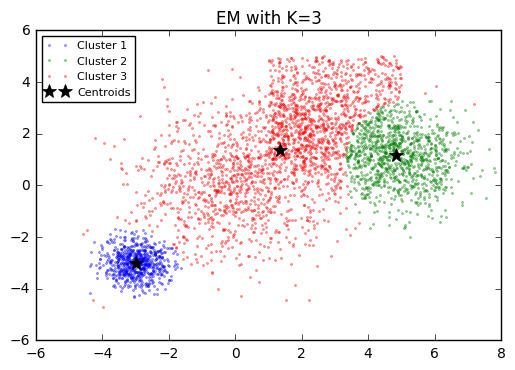

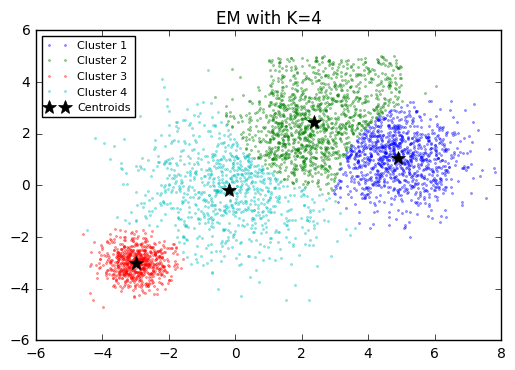

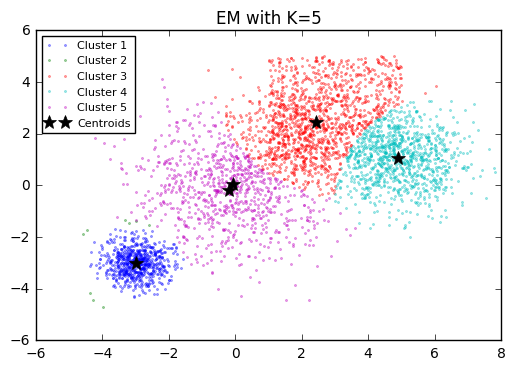

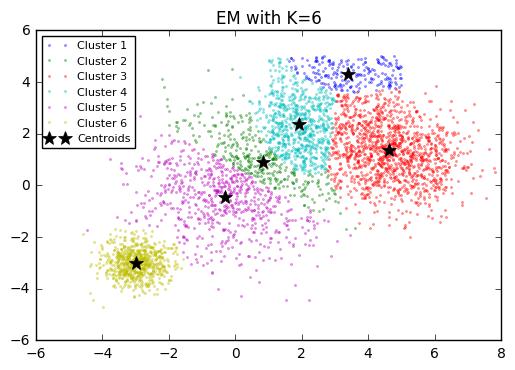

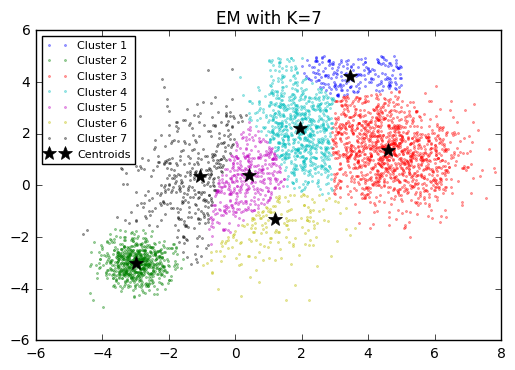

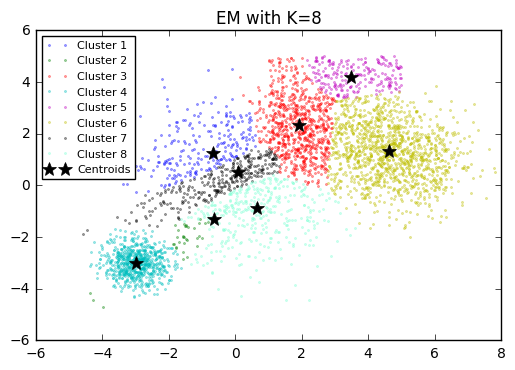

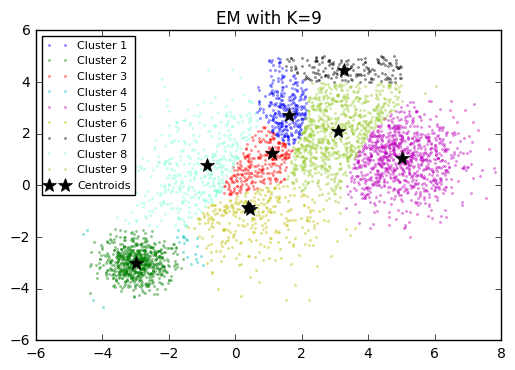

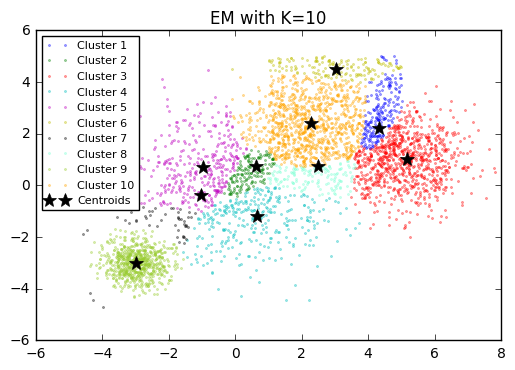

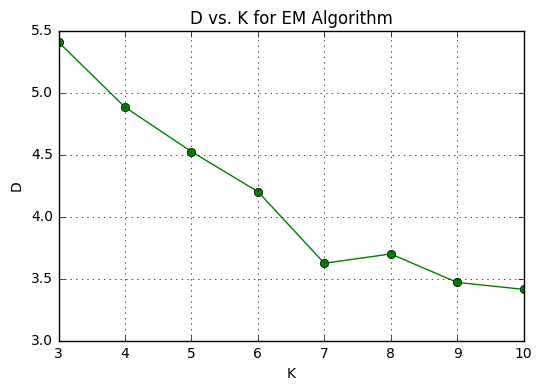

D	 [5.4053655320298999, 4.8813684410594371, 4.5230325740903696, 4.2005189215165206, 3.6231514872088129, 3.6978795897434367, 3.4682827883595047, 3.4127219500852091]
Index
[2 0 1 0 0 1 0 1 0 1 0 0 2 2 0 0 0 0 0 0]
[0 1 2 3 3 2 3 2 1 2 1 3 0 0 1 3 1 1 1 3]
[4 3 1 3 3 1 0 1 3 1 3 2 4 4 3 0 3 3 3 0]
[3 1 4 1 0 4 2 4 1 4 1 0 3 3 1 2 5 1 5 0]
[5 4 2 1 1 2 3 2 1 2 4 6 5 5 1 3 5 4 4 1]
[0 3 7 4 4 7 5 7 3 7 3 6 0 0 3 5 0 3 3 4]
[4 6 2 5 5 2 3 2 6 2 6 1 4 4 6 7 4 6 6 5]
[5 3 9 4 4 9 3 9 3 9 3 7 5 5 3 2 5 3 3 4]


In [14]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
threshold = 1e-7
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D
        
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_EM.pdf')
fig.savefig('./result/loss_bigClustering_EM.png', dpi=300)
plt.show()
print('D\t', loss)
print('Index')
for i in index:
    print(i[:20])